In [1]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import ruptures as rpt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import periodogram

import level_finder as lf
import data_visualization as dv
import level_category as lc
import data_preprocess as dp

AAGCTTATGACGATCGACATCATCATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTATACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGTCAGTACTCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTAAAGGCTCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGAGGACTTATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTGTGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGTCGCTGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGATCGACGTACGATCGATCGATCGATCGATCGATCGCTACTACTACGTACGATCGCTCGATCGTAGTCAGCTAGCTACGATCGATCGATCGATCGATCGGTACGTACGGATCC

较低的level有：
CGTC,8
TGTC,1
CGTT,0
GGTC,0
TGTT,0
GGTT,0
GTTC,0
TGTG,1
CGTG,1
CTTC,0
GTTT,0
TTTC,0
TTTT,0
GTGG,0
CTTT,0
AGTC,10
GTGC,0
CTGT,0
GGTG,0
TTTG,0
ATTC,0
GTGT,1
CGTA,29
TGGT,0
TGTA,0
AGTT,0
TTGC,0
CTTG,0
GTCC,0
CTGC,9
GTTG,0
GGTA,1

In [2]:
abf_24815002 = pyabf.ABF("inputs/24815002.abf")

In [3]:
abf_24815002=lf.downsample(abf_24815002, 100)
arr_24815002= dp.abf2arr(abf_24815002)
arr_24815002 = dp.replace_outliers_with_bounds(arr_24815002,window_size=10)

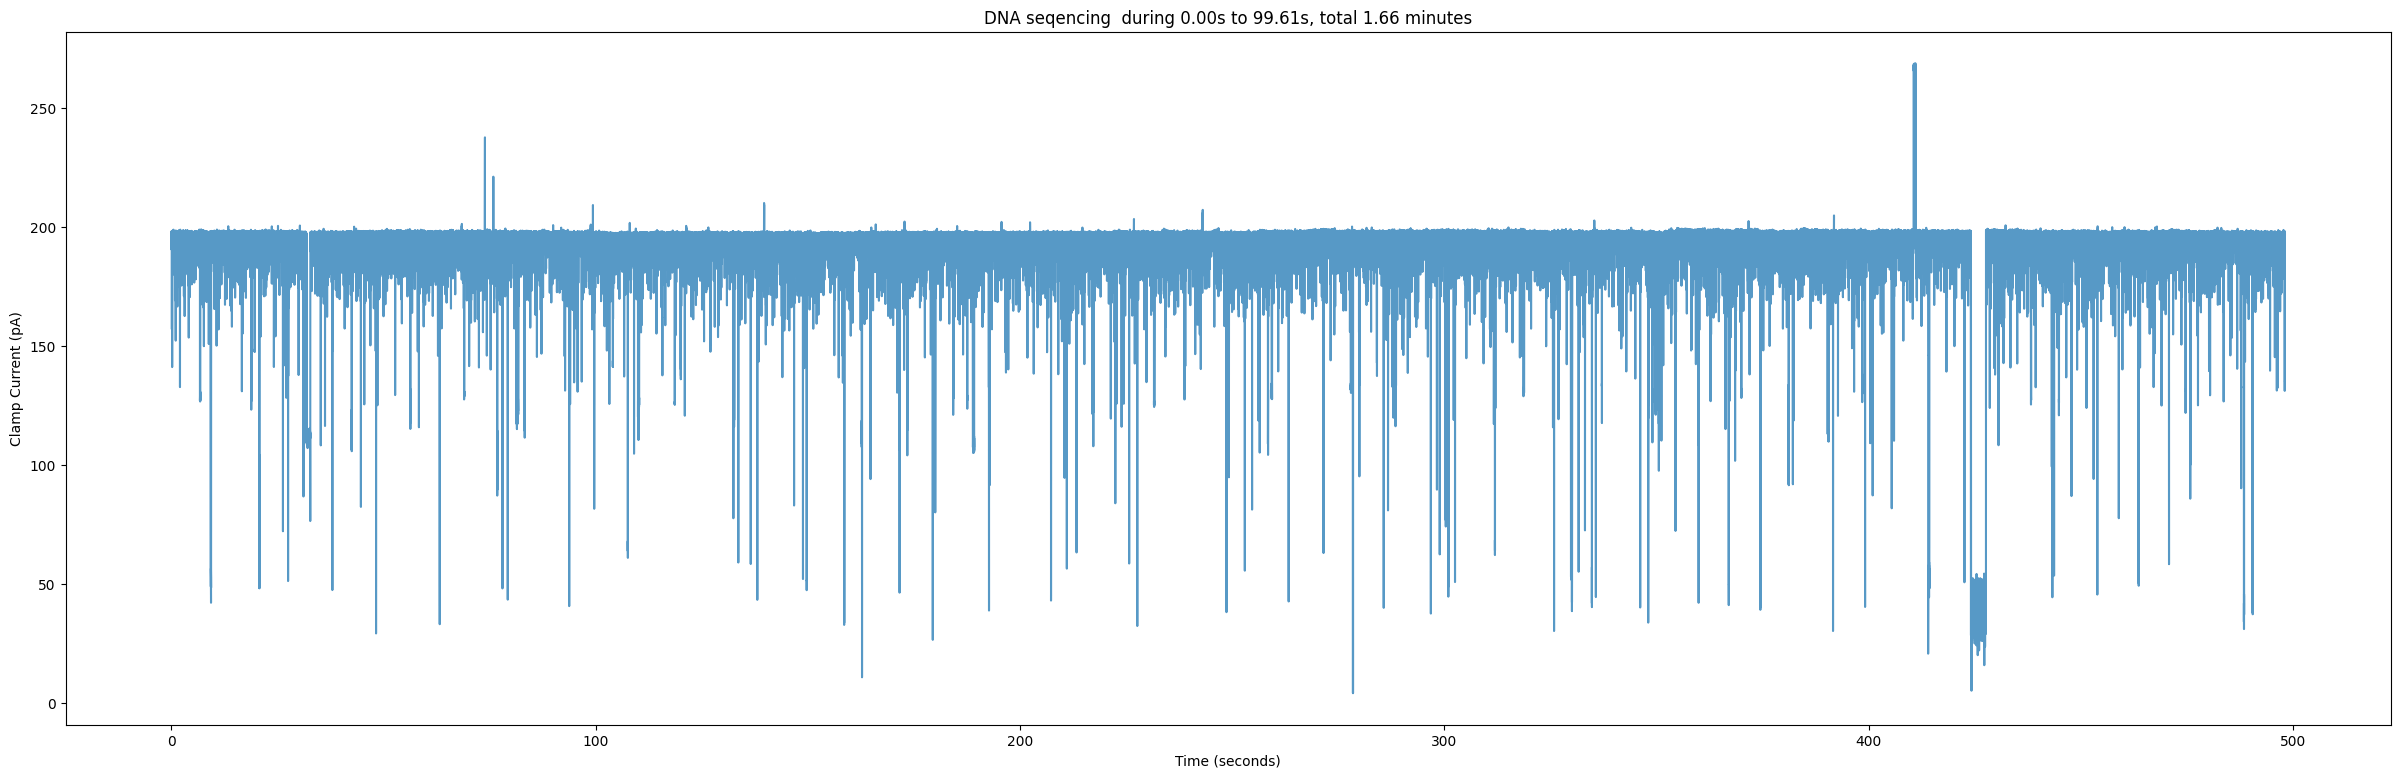

In [4]:
fig=dv.plot_abf(abf_24815002)

In [5]:
i_ranges, t_ranges = lf.find_events_arr(arr_24815002)
print(t_ranges)

[(424.079, 427.609)]


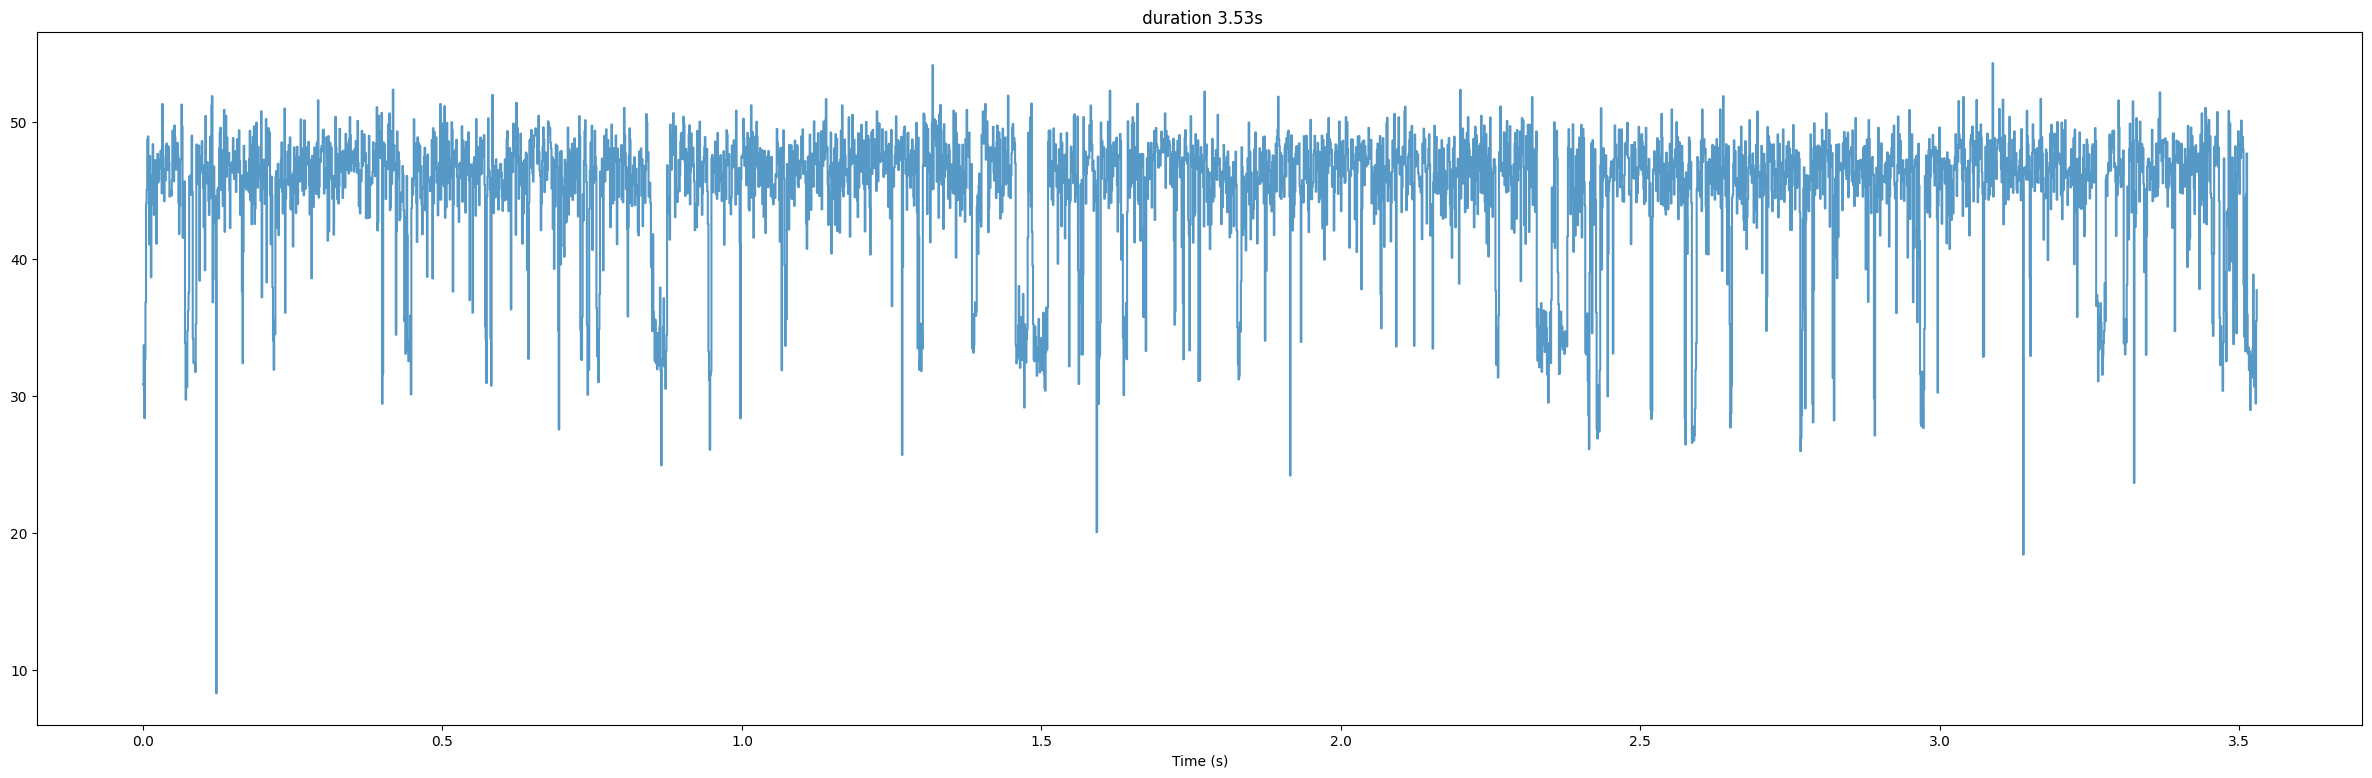

In [6]:
fig = dv.plot_arr(arr_24815002[i_ranges[0][0] : i_ranges[0][1]],sample_rate=100)

In [7]:
list = lf.find_change_points(arr_24815002[i_ranges[0][0] : i_ranges[0][1]],threshold=-30,mindur=2)

Searching in range [3511, 3519]: 100%|██████████| 5/5 [00:00<00:00, 31536.12it/s]


In [8]:
lvls = lf.calc_level4arr(arr_24815002[i_ranges[0][0] : i_ranges[0][1]], list)

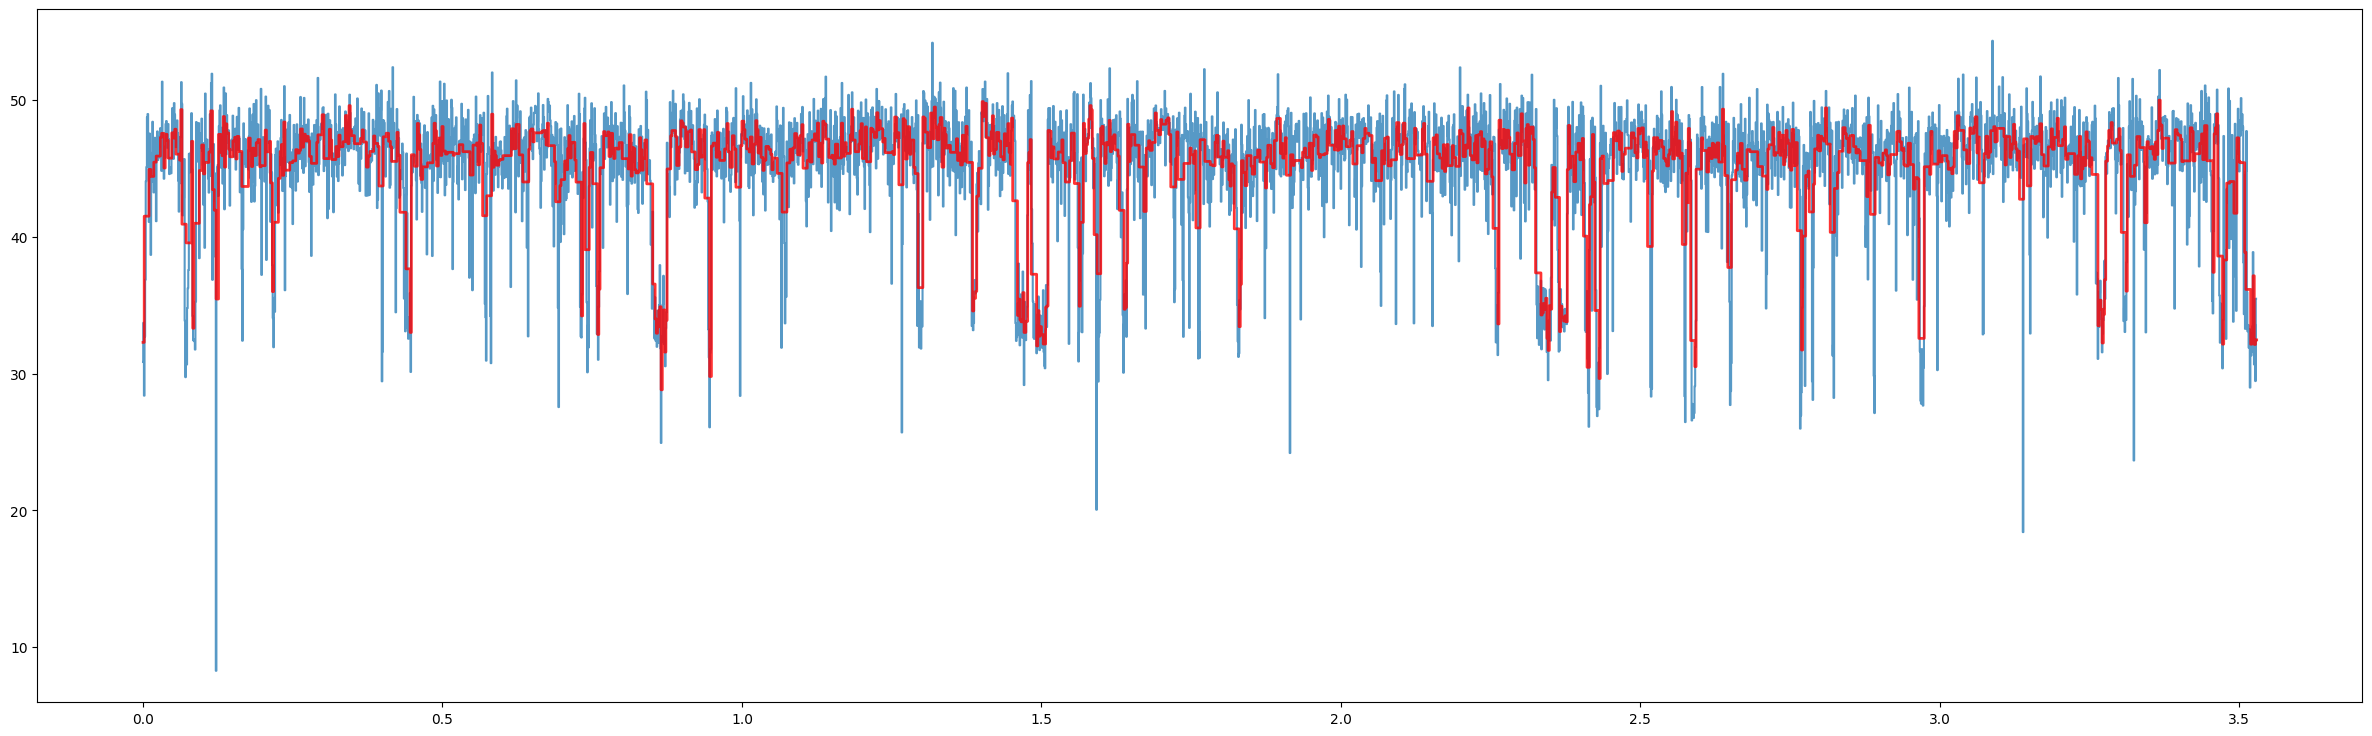

In [9]:
fig = dv.step_arr_lvls(arr_24815002[i_ranges[0][0] : i_ranges[0][1]], lvls, sample_rate=100)

In [10]:
len(list)

1010